# Title: Optimal Regression Model Selection

# Abstract

This project is aimed to determine the most suitable _Regression model_ for a given dataset, with the goal of optimizing predictive accuracy. The methodology involved an exhaustive exploration of various regression models, including: 
1. Linear, 2. Decision Tree, 3. Random Forest, 4. Ridge, 5. Lasso, and 6. Support Vector Regression (SVR). 

The dataset was carefully preprocessed and trained, and evaluation metrics:
1. R-squared, 2. Mean Squared Error (MSE), 3. Root Mean Squared Error (RMSE), and 4. Mean Absolute Error (MAE) 

were employed to quantitatively compare model performance.

Rigorous feature selection methods:
1. Filter techniques - A. Feature Importance, B. Variance Threshold, C. SelectKBest using ANOVA F-value, D. SelectPercentile
2. Wrapper Technique - A. Backward selection, B. RFE (Backward selection method), C. RFE with Cross-Validation (Method 1), D. RFE with Cross-Validation (Method 2)

were also utilised to find most important features.

Feature selection procedures also highlighted the importance of specific predictor variables in enhancing model accuracy. These results have significant implications for decision-making processes reliant on accurate predictions, spanning fields such as finance, economics, and engineering.

The study's outcomes underscore the critical role of model selection in achieving optimal predictions, enabling stakeholders to make informed choices based on robust data-driven insights. The methodologies and insights gleaned from this study provide a valuable framework for selecting regression models tailored to specific datasets, contributing to the advancement of accurate and reliable predictive modeling.

# Introduction

Regression model selection plays a pivotal role in data analysis by determining the most appropriate mathematical framework for modeling relationships between variables. It holds profound significance due to its potential to enhance the accuracy, interpretability, and generalization capabilities of predictive models.

The core essence of regression analysis lies in its ability to unveil hidden patterns, quantify associations, and make informed predictions. However, the effectiveness of these outcomes is directly linked to the selection of the right regression model. A misaligned choice can lead to biased estimates, unreliable predictions, and flawed insights.

A key aspect of regression model selection is striking a balance between model complexity and generalization. Overly complex models may overfit the training data, capturing noise and leading to poor performance on new data. On the other hand, overly simplistic models may overlook important relationships, resulting in underfitting.

Furthermore, different regression techniques cater to distinct types of relationships and data structures. For instance, linear regression assumes a linear relationship between variables, while advanced methods like ridge and lasso regression are designed to handle multicollinearity and prevent overfitting. The relevance of regression model selection extends across diverse fields. In economics, it aids in predicting market trends and consumer behavior. In healthcare, it supports disease prognosis and treatment effectiveness assessment. Environmental science benefits from modeling complex interactions. In all domains, informed model selection translates to more accurate insights, better decision-making, and enhanced problem-solving capabilities.

In conclusion, the careful selection of a regression model is a cornerstone of effective data analysis. It ensures the model's compatibility with the data's nature, enhances predictive accuracy, and amplifies the potential for extracting meaningful insights. As the volume and complexity of data continue to grow, the role of regression model selection becomes increasingly pivotal in unlocking the true value of data-driven exploration and decision-making.

First of all we will import necessary libraries.

In [1]:
from sklearn import linear_model 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The dataset's preparation for analysis entails a meticulous process involving data sources, variables, and preprocessing steps to ensure its reliability and relevance. Ensuring data quality and integrity is crucial to derive accurate insights.

### Data Cleaning and Preprocessing

Eliminate inconsistencies, missing values, and outliers that could distort analysis results. Impute missing data using appropriate methods. Here, I have removed the inconsistencies (missing values) and created a new file for cleaned data. 

In [2]:
data_orig = pd.read_excel('Energy_Mgmt.xlsx',header=1)
# for CSV files function will be pd.read_csv(Filename.csv)

data = data_orig.dropna(subset=['Total active energy (kWh)'])
data.to_excel('Energy_Mgmt_cleaned.xlsx',index=False,sheet_name='Sheet1')
# for CSV files function will be data.to_csv(New_Filename.csv)

print(data.shape)
data.head()

(8480, 107)


,UTC,UTCTimeZone,Time,Avg IL1 (A),Avg IL2 (A),Avg IL3 (A),Avg INe (A),Avg Phase-to-phase voltages U12 (V),Avg Phase-to-phase voltages U23 (V),Avg Phase-to-phase voltages U31 (V),...,Avg OutV1 (V),Max OutV1 (V),Min OutV1 (V),Avg OutV2 (V),Max OutV2 (V),Min OutV2 (V),Avg OutV3 (V),Max OutV3 (V),Min OutV3 (V),Quality
0,4/30/2021 10:14:40 PM +00:00,5/1/2021 12:14:40 AM +02:00,00:15,57,50,50,0,402,401,399,...,0,0,0,0,0,0,0,0,0,High
1,4/30/2021 10:29:40 PM +00:00,5/1/2021 12:29:40 AM +02:00,00:30,57,49,48,0,398,397,396,...,0,0,0,0,0,0,0,0,0,High
2,4/30/2021 10:44:40 PM +00:00,5/1/2021 12:44:40 AM +02:00,00:45,59,50,51,0,397,396,395,...,0,0,0,0,0,0,0,0,0,High
3,4/30/2021 10:59:40 PM +00:00,5/1/2021 12:59:40 AM +02:00,01:00,58,51,50,0,397,396,395,...,0,0,0,0,0,0,0,0,0,High
4,4/30/2021 11:14:40 PM +00:00,5/1/2021 1:14:40 AM +02:00,01:15,57,49,50,0,398,397,396,...,0,0,0,0,0,0,0,0,0,High


### Getting data
I have used a dataset for forest fires with name forestfires.csv containg different variables related to forest fires. I have considered **'Avg Total apparent power (kVA)', 'Avg Total active power (kW)', 'Avg Total reactive power (kVAR)', 'Avg IL1 (A)', 'Avg IL2 (A)', 'Avg IL3 (A)'** as input variables and **'Total active energy (kWh)'** as output variable. You can add you own data, input column names and output column name as independent and dependent variable variables respectively, as this is going to be multivariate analysis. 

### Training data

During the training process, the regression model learns the relationships between the input features and the target output from the training data. It adjusts its internal parameters to minimize the difference between its predictions and the actual target values. 

The train-test split is a fundamental step in machine learning where the dataset is divided into two separate subsets: the training set and the test set. This division is crucial for assessing the performance of a machine learning model accurately. We have considered the the ratio train:test = 20:80 for better training of data and testing it on a smaller data.

In [3]:
# Get data
X_list = ['Avg Total apparent power (kVA)','Avg Total active power (kW)','Avg Total reactive power (kVAR)',
          'Avg IL1 (A)','Avg IL2 (A)','Avg IL3 (A)']
X = data[X_list].values
Y= data['Total active energy (kWh)'].values
# print(X, Y)

# Train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Linear Regression 

Linear regression is a fundamental and widely used statistical method in machine learning and statistics for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, aiming to find the best-fitting linear equation that predicts the dependent variable based on the independent variables.

In its simplest form, a linear regression equation for a single independent variable can be represented as: 

y = b<sub>0</sub> + b<sub>1</sub> x

where y is the dependent variable (target), x is the independent variable (input feature), b<sub>1</sub> is the slope (coefficient) of the line, b<sub>0</sub> is the y-intercept.

For multivariate analysis, equation becomes:

y = b<sub>0</sub> + b<sub>1</sub> x<sub>1</sub> + b<sub>2</sub> x<sub>2</sub> + b<sub>3</sub> x<sub>3</sub> +...+ b<sub>n</sub> x<sub>n</sub>   ----- x<sub>i</sub> and b<sub>i</sub> -- i is a positive integer

where y is the dependent variable (target), x<sub>i</sub> are the independent variables (input features), b<sub>i</sub> is the slope (coefficient) of the line, b<sub>0</sub> is the y-intercept.

In [4]:
# Create a linear regression model
reg = linear_model.LinearRegression()

In [5]:
# Fit the data
reg.fit(X_train, Y_train)

LinearRegression()

In [6]:
# Predict the dependent variable using independent varables from test set
reg_Y_pred = reg.predict(X_test)
print(reg_Y_pred)

[ 8.49394686  8.2891498   8.33379865 ...  8.21004537 14.12505927
 12.33746209]


In [7]:
# Find the y-intercept
reg.intercept_

-0.15129935037990805

In [8]:
# Find the coefficients
reg.coef_

array([0.02641277, 0.0421666 , 0.01373539, 0.04464885, 0.04022726,
       0.03887718])

In [9]:
# Find r-squared score
reg.score(X_test,Y_test)

0.9822973463939889

In [10]:
# Find the prediction error
pred_err_reg = reg_Y_pred-Y_test
# print(pred_err_reg)

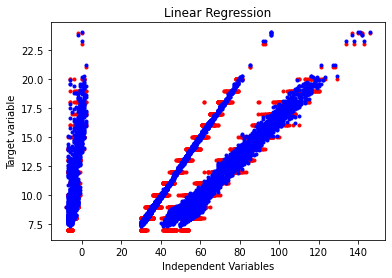

In [11]:
# Plotting Target variables vs Independent variables - given and predicted

# plt.plot(X,Y,'.',color='grey')
plt.plot(X_test,Y_test,'.',color='red')
plt.plot(X_test,reg_Y_pred,'.',color='blue')
# plt.plot(Y_test,reg_Y_pred,'.',color='black')
plt.xlabel("Independent Variables")
plt.ylabel("Target variable")
plt.title("Linear Regression")
plt.show()

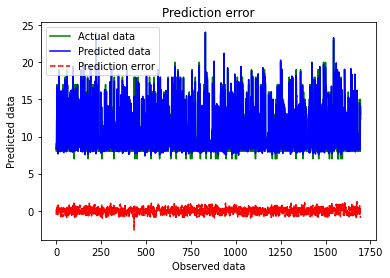

In [12]:
# Plotting Target variables - given, predicted and prediction error

plt.plot(Y_test,color='green',label='Actual data')
plt.plot(reg_Y_pred,'-',color='blue',label='Predicted data')
plt.plot(pred_err_reg,'--',color='red',label='Prediction error')
plt.xlabel("Observed data")
plt.ylabel("Predicted data")
plt.title("Prediction error")
plt.legend()
plt.show()

## Evaluation metrics

Also called performance metrics, are essential tools for assessing the quality of a machine learning model's predictions. They help quantify how well a model is performing and provide insights into its strengths and weaknesses. 

The choice of which metric to use depends on the specific problem, the nature of the data, and the goals of the analysis. It's often a good practice to use a combination of metrics to get a comprehensive understanding of the model's performance. And that's what we will be doing here.

### 1. R-squared (Coefficient of Determination):

1) Represents the proportion of the variance in the dependent variable that's explained by the independent variables.

2) Ranges from 0 to 1; higher values indicate a better fit.

3) Can be interpreted as the model's goodness of fit.

4) It's important to note that R-squared can be misleading in certain cases, especially when dealing with complex models.

In [13]:
r2_reg = metrics.r2_score(Y_test,reg_Y_pred)
print(r2_reg)

0.9822973463939889


### 2. Mean Squared Error (MSE):

1) Measures the average squared difference between predicted values and actual target values.

2) Penalizes larger errors more heavily.

3) Lower values indicate better model performance.

4) MSE = Σ(y_actual - y_predicted)^2 / n

In [14]:
mean2_reg = metrics.mean_squared_error(Y_test,reg_Y_pred)
print(mean2_reg)

0.18265787369372508


### 3. Root Mean Squared Error (RMSE):

1) Derived from MSE by taking the square root.

2) RMSE is in the same unit as the target variable, making it more interpretable.

3) RMSE = √(Σ(y_actual - y_predicted)^2 / n)

In [15]:
rt_mean2_reg = metrics.mean_squared_error(Y_test,reg_Y_pred, squared=False)
print(rt_mean2_reg)

0.42738492450450927


### 4. Mean Absolute Error (MAE):

1) Measures the average absolute difference between predicted values and actual target values.

2) Less sensitive to outliers compared to MSE.

3) MAE = Σ|y_actual - y_predicted| / n

In [16]:
mean_abs_reg = metrics.mean_absolute_error(Y_test,reg_Y_pred)
print(mean_abs_reg)

0.34685142116787004


**Applications:**

Linear regression is used in various fields for prediction, understanding relationships, and making inferences. Common applications include economics (predicting sales based on advertising), medicine (predicting patient outcomes based on medical history), and social sciences (predicting voting behavior based on demographics). Linear regression forms the foundation for more advanced regression techniques and serves as an essential tool for understanding and modeling linear relationships in data.

**Strengths:**

1. Simple and interpretable.
2. Provides insights into relationships between variables.
3. Often serves as a baseline model for more complex methods.

**Limitations:**

1. Assumes linear relationships, which may not hold in all cases.
2. Sensitive to outliers.
3. May not perform well with high-dimensional data or complex interactions.

Linear regression forms the foundation for more advanced regression techniques and serves as an essential tool for understanding and modeling linear relationships in data.

## Decision Tree Regression

Decision Tree Regression is a powerful supervised machine learning algorithm used for both classification and regression tasks. In this context, we'll focus on Decision Tree Regression, which involves predicting a continuous target variable based on input features. Here's an overview of Decision Tree Regression:

1. **Decision Tree:** A decision tree is a hierarchical structure that makes a sequence of decisions based on the input features, leading to a final prediction. It resembles an upside-down tree where each internal node represents a decision based on a specific feature, and each leaf node represents a prediction.

2. **Splitting Criteria:** Decision trees make splits at each internal node based on specific criteria to maximize information gain or minimize impurity. Common splitting criteria include Mean Squared Error (MSE) for regression tasks.

3. **Leaf Value:** The value assigned to a leaf node in a decision tree is typically the average (or median) of the target values of the training examples that reach that leaf.

4. **Overfitting:** Decision trees are prone to overfitting, where they learn the training data's noise and perform poorly on new, unseen data. Techniques like pruning and setting minimum samples per leaf can help mitigate overfitting.

In [17]:
from sklearn import tree 

In [18]:
# Create a Decision tree regression model
Dtree = tree.DecisionTreeRegressor(max_depth=6)

In [19]:
# Fit the data
Dtree_Fit = Dtree.fit(X_train, Y_train)

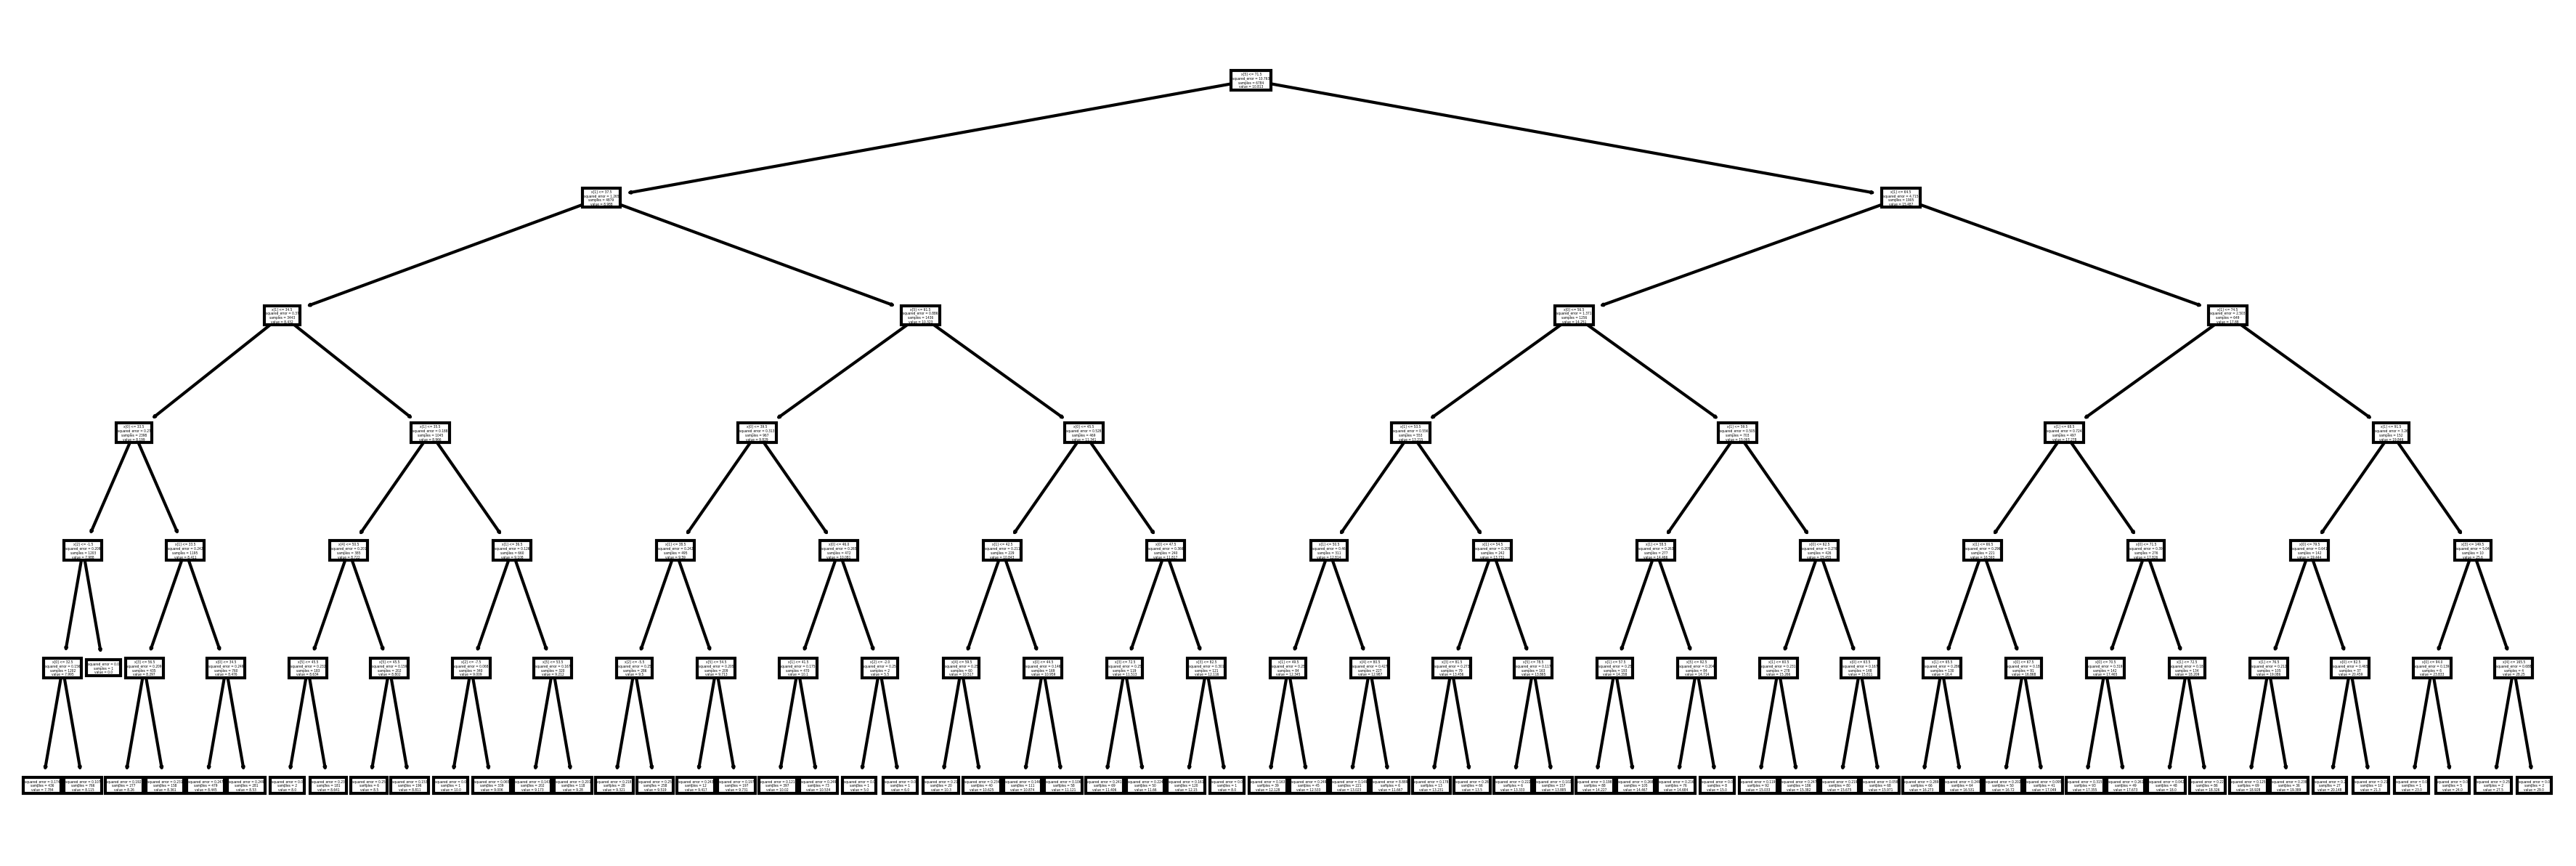

In [20]:
# Draw the decision tree
fig, axes = plt.subplots(figsize = (15,5), dpi=300)
tree.plot_tree(Dtree)
plt.show()
# fig.savefig('E_Mgmt_DTree_6.png') 

In [21]:
# Predict the dependent variable using independent varables from test set
Dtree_Y_pred = Dtree.predict(X_test)
print(Dtree_Y_pred)

[ 8.44467641  8.2599278   8.36075949 ...  8.2599278  14.22727273
 12.15      ]


In [22]:
# Find the prediction error
pred_err_Dtree = Dtree_Y_pred-Y_test
# print(pred_err_Dtree)

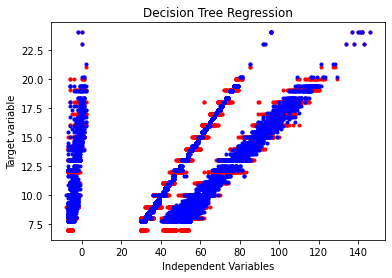

In [23]:
# Plotting Target variables vs Independent variables - given and predicted

# plt.plot(X,Y,'.',color='grey')
# plt.rcParams['figure.figsize'] = (15,6)
plt.plot(X_test,Y_test,'.',color='red')
plt.plot(X_test,Dtree_Y_pred,'.',color='blue')
# plt.plot(Y_test,Dtree_Y_pred,'.',color='black')
plt.xlabel("Independent Variables")
plt.ylabel("Target variable")
plt.title("Decision Tree Regression")
plt.show()

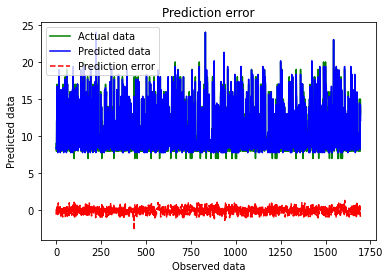

In [24]:
# Plotting Target variables - given, predicted and prediction error

plt.plot(Y_test,color='green',label='Actual data')
plt.plot(Dtree_Y_pred,'-',color='blue',label='Predicted data')
plt.plot(pred_err_Dtree,'--',color='red',label='Prediction error')
plt.xlabel("Observed data")
plt.ylabel("Predicted data")
plt.title("Prediction error")
plt.legend()
plt.show()

## Evaluation metrics

### 1. R-squared (Coefficient of Determination):

In [25]:
r2_Dtree = metrics.r2_score(Y_test,Dtree_Y_pred)
print(r2_Dtree)

0.9814119987337151


### 2. Mean Squared Error (MSE):

In [26]:
mean2_Dtree = metrics.mean_squared_error(Y_test,Dtree_Y_pred)
print(mean2_Dtree)

0.1917929855647728


### 3. Root Mean Squared Error (RMSE):

In [27]:
rt_mean2_Dtree = metrics.mean_squared_error(Y_test,Dtree_Y_pred, squared=False)
print(rt_mean2_Dtree)

0.4379417604713814


### 4. Mean Absolute Error (MAE):

In [28]:
mean_abs_Dtree = metrics.mean_absolute_error(Y_test,Dtree_Y_pred)
print(mean_abs_Dtree)

0.34364391975734915


#### Importances of features

In [29]:
Dtree_imp =pd.Series(Dtree_Fit.feature_importances_, index=X_list).sort_values(ascending=False)
print(Dtree_imp)

Avg IL3 (A)                        0.816584
Avg Total active power (kW)        0.159406
Avg Total apparent power (kVA)     0.021905
Avg IL1 (A)                        0.000942
Avg Total reactive power (kVAR)    0.000925
Avg IL2 (A)                        0.000238
dtype: float64


**Applications**:

Decision Tree Regression's applications span finance (stock price prediction, credit risk assessment), healthcare (patient recovery prediction, disease risk factors), marketing (customer segmentation, churn prediction), retail (demand forecasting, price optimization), and manufacturing (equipment failure prediction, quality control). Its versatility in modeling complex relationships makes it valuable across industries.

**Strengths**:

1. Decision trees are easy to understand and visualize, making them particularly useful for explaining model decisions. 

2. They handle both numerical and categorical data. 

3. Decision trees can capture non-linear relationships between features and the target variable.

**Limitations:**

1. Decision trees can be sensitive to small variations in the data, which can lead to different tree structures. 

2. They are prone to overfitting, especially when the tree is deep. 

3. Decision trees might not perform well when the relationships in the data are complex and involve multiple variables.

Decision Tree Regression's ability to handle both numerical and categorical data makes it suitable for a wide range of applications where understanding and interpreting the relationships between variables are important. However, as with any machine learning technique, it's important to carefully preprocess data, select appropriate features, and fine-tune hyperparameters to achieve optimal results for a specific application.

## Random Forest Regression

Random Forest Regression is a powerful ensemble learning algorithm used for regression tasks. It builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting. Here's a brief overview:

1. **Ensemble Method:** Random Forest combines the predictions of multiple decision trees, known as an ensemble, to provide more accurate and robust predictions.

2. **Randomness:** It introduces randomness by selecting a random subset of features and a random subset of data for each tree, reducing the risk of overfitting.

3. **Prediction Aggregation:** Predictions from individual trees are aggregated through averaging (for regression) to produce the final result.

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Create a Random forest regression model
RF = RandomForestRegressor(random_state=42)

In [32]:
# Fit the data
RF_Fit = RF.fit(X_train, Y_train)

In [33]:
# Predict the dependent variable using independent varables from test set
RF_Y_pred = RF.predict(X_test)
print(RF_Y_pred)

[ 8.15877795  8.44731147  8.39818556 ...  8.0281539  14.12833333
 12.11      ]


In [34]:
# Find r-squared score
RF.score(X_test,Y_test)

0.9783918807080592

In [35]:
# Find the prediction error
pred_err_RF = RF_Y_pred-Y_test
# print(pred_err_RF)

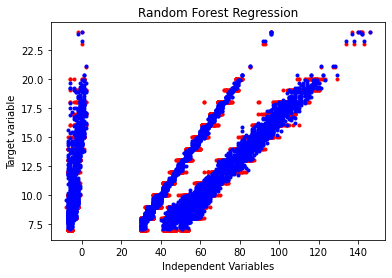

In [36]:
# Plotting Target variables vs Independent variables - given and predicted

# plt.plot(X,Y,'.',color='grey')
# plt.rcParams['figure.figsize'] = (15,6)
plt.plot(X_test,Y_test,'.',color='red')
plt.plot(X_test,RF_Y_pred,'.',color='blue')
plt.xlabel("Independent Variables")
plt.ylabel("Target variable")
plt.title("Random Forest Regression")
plt.show()

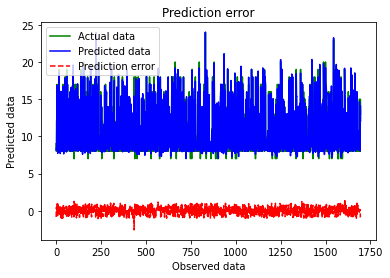

In [37]:
# Plotting Target variables - given, predicted and prediction error

plt.plot(Y_test,color='green',label='Actual data')
plt.plot(RF_Y_pred,'-',color='blue',label='Predicted data')
plt.plot(pred_err_RF,'--',color='red',label='Prediction error')
plt.xlabel("Observed data")
plt.ylabel("Predicted data")
plt.title("Prediction error")
plt.legend()
plt.show()

## Evaluation metrics

### 1. R-squared (Coefficient of Determination):

In [38]:
r2_RF = metrics.r2_score(Y_test,RF_Y_pred)
print(r2_RF)

0.9783918807080592


### 2. Mean Squared Error (MSE):

In [39]:
mean2_RF = metrics.mean_squared_error(Y_test,RF_Y_pred)
print(mean2_RF)

0.22295488643838535


### 3. Root Mean Squared Error (RMSE):

In [40]:
rt_mean2_RF = metrics.mean_squared_error(Y_test,RF_Y_pred, squared=False)
print(rt_mean2_RF)

0.4721809890692184


### 4. Mean Absolute Error (MAE):

In [41]:
mean_abs_RF = metrics.mean_absolute_error(Y_test,RF_Y_pred)
print(mean_abs_RF)

0.3587559964971667


#### Importances of features

In [42]:
RF_imp =pd.Series(RF_Fit.feature_importances_, index=X_list).sort_values(ascending=False)
print(RF_imp)

Avg IL3 (A)                        0.340304
Avg Total apparent power (kVA)     0.315603
Avg Total active power (kW)        0.282738
Avg IL2 (A)                        0.053413
Avg IL1 (A)                        0.005266
Avg Total reactive power (kVAR)    0.002675
dtype: float64


**Applications:**

Similar to Decision Tree Regression, Random Forest Regression finds applications in finance, healthcare, marketing, and other fields for prediction tasks.

**Strengths:**

1. Improved prediction accuracy compared to single decision trees.

2. Handles non-linear relationships and interactions well. 

3. Robust to outliers and noisy data. 

4. Provides feature importance rankings.

**Limitations:**

Complex Interpretation: Random Forest models can be difficult to interpret due to their ensemble nature, making it challenging to understand the precise decision process for individual predictions.

1. Computational Demand: Training multiple decision trees and combining their predictions can be resource-intensive, especially for large datasets or numerous trees.

2. Memory Consumption: Random Forest models can require significant memory, particularly with a high number of features or trees.

3. Overfitting Risk: While Random Forest helps mitigate overfitting compared to single decision trees, it can still overfit noisy or small datasets.

4. Limited Extrapolation: Predictions beyond the range of training data might lack reliability, potentially impacting performance in uncharted domains.

Random Forest Regression is a versatile and powerful algorithm that can produce accurate predictions in various domains. It's a popular choice due to its ability to handle complex relationships and mitigate overfitting.

## Ridge Regression

Ridge Regression, a type of linear regression, is a regularization technique used to prevent overfitting and improve the stability of the regression model. Here's a concise overview:

1. **Regularization:** Ridge Regression adds a regularization term to the linear regression cost function, penalizing large coefficients.

2. **L2 Norm Penalty:** Ridge Regression uses the L2 norm (Euclidean norm) of coefficient values as the regularization term.

3. **Tuning Parameter:** A hyperparameter called lambda (α) controls the strength of regularization. Higher α leads to more regularization.

In [43]:
# Create a ridge regression model
ridge = linear_model.Ridge(alpha=1,max_iter=1000,solver='auto')

In [44]:
# Fit the data
ridge_Fit = ridge.fit(X_train, Y_train)

In [45]:
# Predict the dependent variable using independent varables from test set
ridge_Y_pred = ridge.predict(X_test)
# print(reg_Y_pred)

In [46]:
# Find the y-intercept
ridge.intercept_

-0.15130268215653153

In [47]:
# Find the coefficients
ridge.coef_

array([0.02642447, 0.04215344, 0.01373535, 0.04464886, 0.04022751,
       0.0388779 ])

In [48]:
# Find r-squared score
ridge.score(X_test,Y_test)

0.9822973177831474

In [49]:
# Find the prediction error
pred_err_ridge = ridge_Y_pred-Y_test
# print(pred_err_ridge)

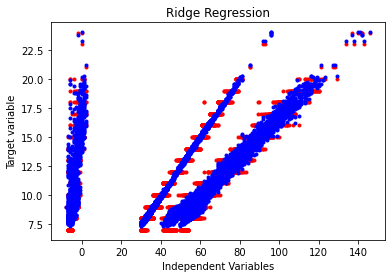

In [50]:
# Plotting Target variables vs Independent variables - given and predicted

# plt.plot(X,Y,'.',color='grey')
plt.plot(X_test,Y_test,'.',color='red')
plt.plot(X_test,ridge_Y_pred,'.',color='blue')
# plt.plot(X_test,reg_Y_pred,'.',color='black')
plt.xlabel("Independent Variables")
plt.ylabel("Target variable")
plt.title("Ridge Regression")
plt.show()

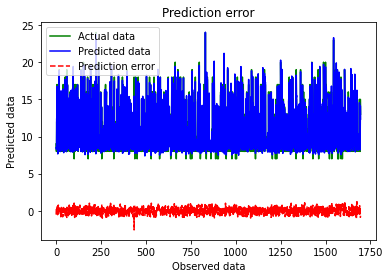

In [51]:
# Plotting Target variables - given, predicted and prediction error

plt.plot(Y_test,color='green',label='Actual data')
plt.plot(ridge_Y_pred,'-',color='blue',label='Predicted data')
plt.plot(pred_err_ridge,'--',color='red',label='Prediction error')
plt.xlabel("Observed data")
plt.ylabel("Predicted data")
plt.title("Prediction error")
plt.legend()
plt.show()

## Evaluation metrics

### 1. R-squared (Coefficient of Determination):

In [52]:
r2_ridge = metrics.r2_score(Y_test,ridge_Y_pred)
print(r2_ridge)

0.9822973177831474


### 2. Mean Squared Error (MSE):

In [53]:
mean2_ridge = metrics.mean_squared_error(Y_test,ridge_Y_pred)
print(mean2_ridge)

0.18265816890344813


### 3. Root Mean Squared Error (RMSE):

In [54]:
rt_mean2_ridge = metrics.mean_squared_error(Y_test,ridge_Y_pred, squared=False)
print(rt_mean2_ridge)

0.4273852698718665


### 4. Mean Absolute Error (MAE):

In [55]:
mean_abs_ridge = metrics.mean_absolute_error(Y_test,ridge_Y_pred)
print(mean_abs_ridge)

0.34685199849869963


**Applications:**

Used in scenarios where multicollinearity is present, such as economics and social sciences. Suitable when there's a risk of overfitting due to a large number of features.

**Strengths:**

1. Reduces overfitting by controlling coefficient magnitudes.

2. Improves model stability and generalization to new data.

3. Can handle multicollinearity (high correlation between predictors) effectively.

**Limitations:**

1. Bias-Variance Trade-off: Ridge Regression strikes a balance between bias and variance, but excessive regularization (high α) can lead to underfitting.

2. Feature Selection: Ridge Regression doesn't explicitly eliminate features, making it less suitable for feature selection tasks.

3. Scaling Sensitivity: Proper feature scaling is crucial for Ridge Regression's performance, as it's sensitive to feature magnitudes.

4. Non-Linearity Limitation: Limited ability to capture complex non-linear relationships in data due to its linear nature.

Ridge Regression provides a balance between fitting the data well and preventing overfitting, making it useful for cases where there's a concern about the model's complexity and potential instability.

## Lasso Regression 

Lasso Regression, another form of linear regression, is a regularization technique that helps prevent overfitting and feature selection. Here's a brief summary:

1. **Regularization:** Lasso Regression adds a regularization term to the linear regression cost function, penalizing large coefficients.

2. **L1 Norm Penalty:** Lasso uses the L1 norm (sum of absolute values) of coefficient values as the regularization term.

3. **Tuning Parameter:** The hyperparameter lambda (α) controls the strength of regularization. Higher α increases the penalty.

In [56]:
# Create a lasso regression model
lasso = linear_model.Lasso(alpha=1,max_iter=1000)

In [57]:
# Fit the data
lasso_Fit = lasso.fit(X_train, Y_train)

In [58]:
# Predict the dependent variable using independent varables from test set
lasso_Y_pred = lasso.predict(X_test)
# print(lasso_Y_pred)

In [59]:
# Find the y-intercept
lasso.intercept_

0.39455750864570227

In [60]:
# Find the coefficients
lasso.coef_

array([0.        , 0.        , 0.        , 0.03269461, 0.05220888,
       0.07775008])

In [61]:
# Find r-squared score
lasso.score(X_test,Y_test)

0.9809242721936722

In [62]:
# Find the prediction error
pred_err_lasso = lasso_Y_pred-Y_test
# print(pred_err_lasso)

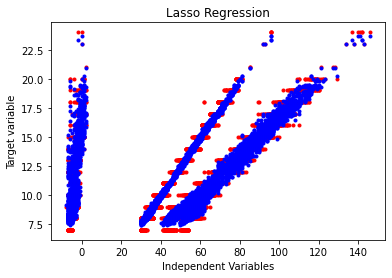

In [63]:
# Plotting Target variables vs Independent variables - given and predicted

# plt.plot(X,Y,'.',color='grey')
plt.plot(X_test,Y_test,'.',color='red')
plt.plot(X_test,lasso_Y_pred,'.',color='blue')
# plt.plot(Y_test,lasso_Y_pred,'.',color='black')
plt.xlabel("Independent Variables")
plt.ylabel("Target variable")
plt.title("Lasso Regression")
plt.show()

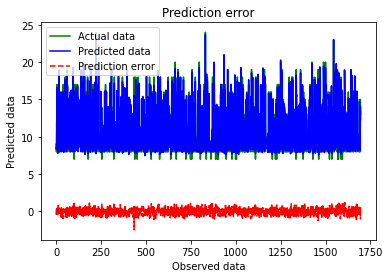

In [64]:
# Plotting Target variables - given, predicted and prediction error

plt.plot(Y_test,color='green',label='Actual data')
plt.plot(lasso_Y_pred,'-',color='blue',label='Predicted data')
plt.plot(pred_err_lasso,'--',color='red',label='Prediction error')
plt.xlabel("Observed data")
plt.ylabel("Predicted data")
plt.title("Prediction error")
plt.legend()
plt.show()

## Evaluation metrics

### 1. R-squared (Coefficient of Determination):

In [65]:
r2_lasso = metrics.r2_score(Y_test,lasso_Y_pred)
print(r2_lasso)

0.9809242721936722


### 2. Mean Squared Error (MSE):

In [66]:
mean2_lasso = metrics.mean_squared_error(Y_test,lasso_Y_pred)
print(mean2_lasso)

0.19682540018073733


### 3. Root Mean Squared Error (RMSE):

In [67]:
rt_mean2_lasso = metrics.mean_squared_error(Y_test,lasso_Y_pred, squared=False)
print(rt_mean2_lasso)

0.44365008754731167


### 4. Mean Absolute Error (MAE):

In [68]:
mean_abs_lasso = metrics.mean_absolute_error(Y_test,lasso_Y_pred)
print(mean_abs_lasso)

0.3610127744085787


**Applications:**

Used when feature selection is important, such as in genetics, image processing, and financial modeling. Suitable for cases where there's a concern about overfitting or too many irrelevant features.

**Strengths:**

1. Performs automatic feature selection by driving some coefficients to exactly zero, effectively excluding less relevant features.

2. Effective for datasets with many features or multicollinearity.

3. Enhances model interpretability by reducing the number of non-zero coefficients.

**Limitations:**

1. Sparse Solutions: While Lasso performs automatic feature selection, it might lead to excessively sparse models, excluding some useful variables.

2. Scaling Sensitivity: Feature scaling is crucial for Lasso's performance, similar to Ridge Regression, as it's sensitive to feature magnitudes.

3. Non-Convergence: Lasso's optimization process can struggle with highly correlated features or very large datasets, leading to non-convergence.

4. Limited Variables: Lasso's feature selection might omit relevant variables if their impact is subtle or intertwined with other features.

Lasso Regression helps create simpler and more interpretable models by selecting relevant features while reducing overfitting, making it valuable for scenarios with a high number of features and multicollinearity.

## Support Vector Regression (SVR)

Support Vector Regression (SVR) is a powerful regression technique that uses Support Vector Machines (SVMs) to predict continuous outcomes. Here's a concise overview, along with its limitations:

1. **Hyperplane Fitting:** SVR aims to find a hyperplane that best fits the data, considering a specified margin around the hyperplane.

2. **Kernel Trick:** SVR can handle non-linear relationships by mapping the data into a higher-dimensional space using kernel functions.

3. **Epsilon-Sensitive Loss Function:** SVR introduces an epsilon-insensitive loss function that allows for a specified tolerance around the predicted values.

In [69]:
from sklearn.svm import SVR

In [70]:
# Fit the data
svr_Fit = SVR().fit(X_train, Y_train)

In [71]:
# Predict the dependent variable using independent varables from test set
svr_Y_pred = svr_Fit.predict(X_test)
# print(svr_Y_pred)

In [72]:
# Find the y-intercept
svr_Fit.intercept_

array([15.65785632])

In [ ]:
# Find r-squared score
svr_Fit.score(X_test,Y_test)

In [ ]:
# Find the prediction 
pred_err_svr = svr_Y_pred-Y_test
# print(pred_err_svr)

In [ ]:
# Plotting Target variables vs Independent variables - given and predicted

# plt.plot(X,Y,'.',color='grey')
plt.plot(X_test,Y_test,'.',color='red')
plt.plot(X_test,svr_Y_pred,'.',color='blue')
plt.xlabel("Independent Variables")
plt.ylabel("Target variable")
plt.title("SVR Regression")
plt.show()

In [ ]:
# Plotting Target variables - given, predicted and prediction error

plt.plot(Y_test,color='green',label='Actual data')
plt.plot(svr_Y_pred,'-',color='blue',label='Predicted data')
plt.plot(pred_err_svr,'--',color='red',label='Prediction error')
plt.xlabel("Observed data")
plt.ylabel("Predicted data")
plt.title("Prediction error")
plt.legend()
plt.show()

## Evaluation metrics

### 1. R-squared (Coefficient of Determination):

In [ ]:
r2_svr = metrics.r2_score(Y_test,svr_Y_pred)
print(r2_svr)

### 2. Mean Squared Error (MSE):

In [ ]:
mean2_svr = metrics.mean_squared_error(Y_test,svr_Y_pred)
print(mean2_svr)

### 3. Root Mean Squared Error (RMSE):

In [ ]:
rt_mean2_svr = metrics.mean_squared_error(Y_test,svr_Y_pred, squared=False)
print(rt_mean2_svr)

### 4. Mean Absolute Error (MAE):

In [ ]:
mean_abs_svr = metrics.mean_absolute_error(Y_test,svr_Y_pred)
print(mean_abs_svr)

**Applications:**

Used in finance for stock price prediction, in healthcare for disease progression modeling, and in various fields for time series forecasting.

**Strengths:**

1. Effective for capturing complex relationships, even in high-dimensional spaces.

2. Handles non-linear data through kernel functions.

3. Provides control over model complexity through tuning hyperparameters.

**Limitations**

1. Sensitive to Hyperparameters: SVR performance heavily depends on selecting appropriate kernel and regularization parameters, which can be challenging.

2. Computational Complexity: Training SVR models, especially with non-linear kernels and large datasets, can be computationally intensive.

3. Memory Consumption: SVR models, especially those with complex kernels, can consume significant memory resources.

4. Interpretability: SVR models are less interpretable than linear regression due to their non-linear nature and reliance on kernel functions.

5. Limited for Noisy Data: SVR might struggle with noisy data or outliers, affecting model performance and robustness.

Support Vector Regression offers a robust approach for regression tasks, particularly when dealing with non-linear data. However, careful parameter tuning and consideration of its limitations are crucial for achieving optimal results.

## Best Regression Model based on Evaluation Metrics

So far we have calculated the evaluation metrics values. Now we will decide the optimum model based on these values.

In [ ]:
Evaluation_metrics = ['R2 score','MSE','Root MSE','MAE']

In [ ]:
All_r2 = [r2_reg, r2_Dtree, r2_RF, r2_ridge, r2_lasso, r2_svr]
All_MSE = [mean2_reg, mean2_Dtree, mean2_RF, mean2_ridge, mean2_lasso, mean2_svr]
All_rt_MSE = [rt_mean2_reg, rt_mean2_Dtree, rt_mean2_RF, rt_mean2_ridge, rt_mean2_lasso, rt_mean2_svr]
All_MAE = [mean_abs_reg, mean_abs_Dtree, mean_abs_RF, mean_abs_ridge, mean_abs_lasso, mean_abs_svr]

r2_best = max(All_r2)
MSE_best = min(All_MSE)
rt_MSE_best = min(All_rt_MSE)
MAE_best = min(All_MAE)

Values = [r2_best, MSE_best, rt_MSE_best, MAE_best]

In [ ]:
Name_Reg_models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'SVR (Support Vector Regression)']

model_r2_best = Name_Reg_models[All_r2.index(r2_best)]
model_MSE_best = Name_Reg_models[All_MSE.index(MSE_best)]
model_rt_MSE_best = Name_Reg_models[All_rt_MSE.index(rt_MSE_best)]
model_MAE_best = Name_Reg_models[All_MAE.index(MAE_best)]

Regression_models = [model_r2_best, model_MSE_best, model_rt_MSE_best, model_MAE_best]

In [ ]:
Best_models = pd.DataFrame(list(zip(Evaluation_metrics,Regression_models,Values)), columns=['Evaluation Metrics', 'Best Regression model', 'Value'])
print(Best_models)

In [ ]:
## Optimum Regression model

In [ ]:
most_recurring = Best_models['Best Regression model'].value_counts()
print(f'The Optimum Regression model is: {most_recurring}')

## Feature Selection methods

Feature selection is a critical step in machine learning that involves selecting a subset of relevant features from the original set of features to improve model performance, reduce overfitting, and enhance interpretability. 

### Feature Importance

A heatmap is a graphical representation of data where values are represented by colors. While heatmaps are not typically used to directly visualize feature importance, they can be employed to visually explore correlations between features and the target variable, which indirectly provides insights into feature importance. 

In [ ]:
X_np = pd.DataFrame(data.iloc[:, [45,33,57,3,4,5]]) 
X_df = pd.DataFrame(X_np)
Y_np = pd.DataFrame(data.iloc[:,94])
Y_df = pd.DataFrame(Y_np)

In [ ]:
# Plot a heatmap 
import seaborn as sns
sns.set_theme()
corrmat = X_df.corr()
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(10,5))
g=sns.heatmap(X_df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

## Filter techniques

Filter methods are a category of feature selection techniques that involve filtering out irrelevant or redundant features from the dataset before the model is built. These methods rely on statistical measures or scores to evaluate the relationship between each feature and the target variable, without involving the model's performance.

### Variance Threshold 

Variance Threshold is a feature selection technique that focuses on filtering out features with low variance, as they may carry little information or exhibit minimal variation within the dataset. This method is particularly useful for dealing with numerical features, and it's applied prior to building a predictive model. 

Useful in Classification: Variance Threshold is often used in classification tasks, where low-variance features might not contribute significantly to distinguishing between classes.

In [ ]:
import sklearn.feature_selection as FS

In [ ]:
# Determine the features to be included
feature_names = X_df.columns
print(feature_names)

In [ ]:
# Select features
VarThresh = FS.VarianceThreshold(threshold=5)
VarThresh_fit = VarThresh.fit(X_df)
print(VarThresh_fit)

print(VarThresh_fit.get_support())
result_r = [feature_names[i] for i, n in enumerate(VarThresh_fit.get_support()) if n == 1]
print("Selected Features: %s" % result_r)

**Considerations:**

1. Variance Threshold is not suitable for categorical features or when interactions between features are crucial.

2. It's important to scale features before applying Variance Threshold, especially if they have different scales.

**Advantages:**

1. Quickly removes low-variance features, reducing dimensionality.

2. Can improve model performance and interpretability, especially when dealing with noisy or uninformative features.

**Limitations:**

1. It might remove features that, while having low variance, are still informative when combined with other features.

2. Careful consideration of the threshold is required; setting it too low might exclude potentially useful features.

Variance Threshold is a simple yet effective method for feature selection, especially in cases where features with little variability are likely to be noise or redundant.

### SelectKBest using ANOVA F-value 

SelectKBest is a feature selection technique that evaluates the relationship between each feature and the target variable using statistical tests. ANOVA F-value (Analysis of Variance F-value) is one such test used to select the top k features with the highest F-scores. This method is commonly applied in classification and regression tasks.

In [ ]:
# Change shape
KBest_fclassif  = FS.SelectKBest(score_func=FS.f_classif,k=1)
KBest_fclassif_fit = KBest_fclassif.fit_transform(X,Y)
print(f'Original shape: {X.shape}, New shape: {KBest_fclassif_fit.shape}')

In [ ]:
# Select features
KBest_fclassif.fit(X,Y)
KBest_fclassif_feature_indices = KBest_fclassif.get_support()
KBest_fclassif_feature_names = X_df.columns[KBest_fclassif_feature_indices]
print("Selected Features:", KBest_fclassif_feature_names)

#### Chi-Square (χ²):

The Chi-Square statistic is a measure used in statistics to assess the significance of the association between categorical variables. In the context of feature selection, the Chi-Square score is often used to evaluate the relationship between a categorical feature and a categorical target variable. It helps determine if the distribution of a feature's categories is independent of the target variable's categories or if there's a significant association.

In [ ]:
# chi2 scores for all features
KBest_fclassif_chi2_scores = pd.DataFrame(list(zip(feature_names,KBest_fclassif.scores_)), columns=['feature','score'])
print(KBest_fclassif_chi2_scores)

**Considerations:**

1. It's crucial to specify the appropriate value of k, which determines the number of selected features.

2. ANOVA F-value assumes that the features are normally distributed and have equal variances across different classes.

**Advantages:**

1. Selects the most relevant features based on their significance in explaining the target variable's variance.

2. Can improve model performance by reducing noise and overfitting.

**Limitations:**

1. May not capture complex non-linear relationships between features and the target.
2. Assumes that features are independent, which might not hold true in some cases.

SelectKBest using ANOVA F-value is a valuable technique for feature selection, particularly when dealing with classification or regression problems and when linear relationships are relevant. It helps to focus on the most informative features for your model.

### SelectPercentile

SelectPercentile is a feature selection technique that selects the top features based on a specified percentile of their statistical scores. This method is particularly useful when you want to retain a certain proportion of the most relevant features while discarding the rest. It can be applied with various statistical tests, such as ANOVA F-value for classification or regression tasks.

In [ ]:
# Change shape
Percentile_fclassif  = FS.SelectPercentile(score_func=FS.f_classif)
Percentile_fclassif_fit = Percentile_fclassif.fit_transform(X,Y)
print(f'Original shape: {X.shape}, New shape: {Percentile_fclassif_fit.shape}')

In [ ]:
# Select features 
Percentile_fclassif.fit(X,Y)
Percentile_fclassif_feature_indices = Percentile_fclassif.get_support()
Percentile_fclassif_feature_names = X_df.columns[Percentile_fclassif_feature_indices]
print("Selected Features:", Percentile_fclassif_feature_names)

In [ ]:
# chi2 scores for all features
Percentile_fclassif_scores = pd.DataFrame(list(zip(feature_names,Percentile_fclassif.scores_)), columns=['feature','score'])
print(Percentile_fclassif_scores)

**Considerations:**

1. The percentile value directly influences the number of selected features. 

2. A higher percentile retains more features.

**Advantages:**

1. Automatically selects a proportion of top features, allowing you to balance between dimensionality reduction and information retention.

2. Particularly useful when you have a large number of features and want to maintain a certain level of interpretability.

**Limitations:**

1. Similar to SelectKBest, SelectPercentile may not capture complex non-linear relationships and assumes feature independence.

SelectPercentile is a flexible method for feature selection, giving you control over the proportion of features to retain based on their significance in explaining the target variable's variance. It helps strike a balance between model performance and dimensionality reduction.

## Wrapper Technique

Wrapper techniques are a category of feature selection methods that evaluate the performance of a machine learning model using a specific subset of features. Unlike filter methods that use statistical measures, wrapper techniques involve training and evaluating a model multiple times with different feature subsets.

### Backward selection

Backward Elimination is a specific type of wrapper technique for feature selection. It involves iteratively removing the least significant features from the original feature set until a stopping criterion is met. This method is often used in the context of regression analysis to identify the most relevant subset of features for building a predictive model. 

In [ ]:
# Create the model
bwd_rfe_model = linear_model.LinearRegression()
bwd_rfe = FS.RFE(estimator=bwd_rfe_model,n_features_to_select=3)
bwd_rfe.fit(X, Y)

In [ ]:
# Apply masking
bwd_rfe_feature_mask = bwd_rfe.support_
print(bwd_rfe_feature_mask)

In [ ]:
# Select features
bwd_rfe_feature_indices = np.where(bwd_rfe_feature_mask)[0]
bwd_rfe_feature_names = feature_names[bwd_rfe_feature_indices]
print("Selected Features:",bwd_rfe_feature_names)
# print(bwd_rfe_feature_indices)

In [ ]:
# Indices of selected features
X_bwd_rfe = X[:, bwd_rfe_feature_indices]
# print(X_bwd_rfe)

**Considerations:**

1. Statistical Significance: Backward elimination relies on statistical tests like p-values. Ensure that assumptions like normality and linearity are met for accurate significance assessment.

2. Multicollinearity Impact: Removing one feature can affect the significance of others, especially in multicollinear scenarios. Removed features might be important due to correlation.

3. Stopping Criteria: Choosing the right stopping point is vital. Too few features can lead to underfitting, while too many may cause overfitting. Balance based on desired model performance.

4. Domain Expertise: Backward elimination may exclude theoretically important features. Consult domain knowledge to guide the process and prevent eliminating crucial variables.

**Advantages:**

1. Backward elimination provides a systematic way to identify the most important features for a predictive model.

2. It can help in simplifying the model and improving its interpretability.

**Limitations:**

1. The process can be computationally intensive, especially with a large number of features.

2. Backward elimination may not capture complex interactions between features, and it assumes that the model's performance improves with fewer features.

Backward elimination is a structured approach for selecting features based on their significance in a model. While it has limitations, such as assuming linear relationships and interactions, it can be a useful tool in achieving model parsimony and interpretability.

### RFE (Backward selection method)

Recursive Feature Elimination (RFE) is a specific type of backward selection method for feature selection. It iteratively removes the least significant features from the model while evaluating its performance. RFE is particularly useful when building predictive models and aims to identify the most relevant subset of features.

In [ ]:
rfe_mod = FS.RFE(linear_model.LinearRegression(),n_features_to_select=3)
rfe_values=rfe_mod.fit(X,Y)
rfe_values.support_
rfe_values.ranking_
print("No. of Selected Features: %s" % (rfe_values.n_features_))
print("Selected Features mask: %s" % (rfe_values.support_))
print("Selected Features ranking: %s" % (rfe_values.ranking_))
result_rfe = [feature_names[i] for i, n in enumerate(rfe_values.support_) if n == 1]
print("Selected Features: %s" % result_rfe)

**Considerations:**

1. Choose an appropriate estimator for RFE that matches the problem type (classification, regression, etc.).

2. Balance the number of features retained with model complexity and performance.

**Advantages:**

1. RFE systematically evaluates feature importance, capturing complex interactions and dependencies.

2. It can lead to improved model performance and interpretability by selecting only relevant features.

**Limitations:**

1. RFE can be computationally intensive, especially with a large number of features.

2. Model instability due to feature elimination might require careful parameter tuning.

RFE is a robust method for feature selection, suitable for a wide range of modeling techniques. It helps in identifying the most important features by iteratively evaluating their contribution to the model's performance.

### RFE with Cross-Validation

Recursive Feature Elimination with Cross-Validation (RFECV) is an advanced version of the RFE method that incorporates cross-validation during the feature selection process. It addresses some of the limitations of standard RFE by providing a more reliable and robust estimate of feature importance.

### RFE with Cross-Validation (Method 1)

This method is similar to the **"Backward selection"** that we have performed previously.

In [ ]:
# Create the model
bwd_rfecv_model = linear_model.LinearRegression()
bwd_rfecv = FS.RFECV(estimator=bwd_rfecv_model, cv=2)
bwd_rfecv.fit(X, Y)

In [ ]:
# Apply masking
bwd_rfecv_feature_mask = bwd_rfecv.support_
print(bwd_rfecv_feature_mask)

In [ ]:
# Select features
bwd_rfecv_feature_indices = np.where(bwd_rfecv_feature_mask)[0]
bwd_rfecv_feature_names = feature_names[bwd_rfecv_feature_indices]
print("Selected Features:",bwd_rfecv_feature_names)
# print(bwd_rfecv_feature_indices)

In [ ]:
# Indices of selected features
X_bwd_rfecv = X[:, bwd_rfecv_feature_indices]
# print(X_bwd_rfecv)

### RFE with Cross-Validation (Method 2)

This method is similar to the **"RFE (Backward selection method)"** that we have performed previously. 

In [ ]:
rfecv_mod = FS.RFECV(linear_model.LinearRegression(),cv=2)
rfecv_values=rfecv_mod.fit(X,Y)
rfecv_values.support_
rfecv_values.ranking_
print("No. of Selected Features: %s" % (rfecv_values.n_features_))
print("Selected Features mask: %s" % (rfecv_values.support_))
print("Selected Features ranking: %s" % (rfecv_values.ranking_))
result_rfecv = [feature_names[i] for i, n in enumerate(rfecv_values.support_) if n == 1]
print("Selected Features: %s" % result_rfecv)

**Considerations:**

1. Choose an appropriate estimator for RFECV that matches the problem type (classification, regression, etc.).

2. Specify the cross-validation strategy (cv) and scoring metric (scoring) according to your dataset and modeling objectives.

**Advantages:**

1. RFECV offers more reliable feature selection by incorporating cross-validation to estimate feature importance.

2. It helps mitigate overfitting and enhances model generalization.

**Limitations:**

1. RFECV can be computationally intensive due to repeated cross-validation iterations.

2. Model instability due to feature elimination might require careful parameter tuning.

RFECV is a powerful feature selection technique that takes into account both feature importance and model performance via cross-validation. It provides a more accurate estimate of feature relevance and contributes to building more robust predictive models.

#  Implications and Applications:

Optimal model selection has profound implications for real-world decision-making, shaping a wide spectrum of industries and applications. By choosing the most suitable predictive model, businesses and organizations can significantly enhance their operations and outcomes. The accurate predictions facilitated by optimal model selection lead to heightened accuracy and performance, which is critical in fields such as finance, healthcare, and manufacturing.

One of the key benefits is resource optimization. Industries like supply chain management, energy distribution, and agriculture benefit from precise predictions that reduce inefficiencies and wastage, thereby contributing to cost reduction. Moreover, optimal model selection aids in risk mitigation, enabling better assessment and management of potential threats in fields like insurance and finance.

In healthcare, optimal models play a pivotal role in medical diagnosis, treatment selection, and prognosis, ultimately leading to improved patient outcomes. The environmental impact is substantial as well, with accurate predictions guiding disaster preparedness, ecosystem conservation, and climate change responses.

Across domains, optimal model selection has transformative effects on scientific research, public policy, customer experiences, and educational advancements. It empowers decision-makers with data-driven insights, fostering effective governance, strategic planning, and innovation. Ultimately, optimal model selection is a cornerstone of modern decision-making, shaping a more efficient, informed, and impactful world.

# Conclusion:

In conclusion, the study underscores several pivotal takeaways that emphasize the critical role of optimal regression model selection in data analysis and decision-making. The process of identifying and choosing the most suitable model holds profound implications for real-world applications.

First and foremost, optimal model selection directly contributes to heightened accuracy and predictive performance. Through a systematic evaluation of various regression techniques, the study highlights the potential for achieving more precise and reliable predictions across diverse domains. This accuracy translates into enhanced resource allocation, cost reduction, and risk management, empowering organizations to make informed decisions.

Furthermore, the study underscores the value of resource optimization. By carefully selecting the optimal regression model, industries can streamline operations, reduce inefficiencies, and ensure the optimal allocation of valuable resources. This resonates particularly in sectors such as manufacturing, finance, and healthcare.

Additionally, the study's findings emphasize that optimal regression model selection is not a mere technical step, but rather a strategic imperative. The right model not only improves accuracy but also facilitates better interpretability and understanding of underlying relationships within the data.

In essence, the study affirms that optimal regression model selection is a linchpin of modern data analysis. Its impact spans across industries and applications, from enhancing decision-making processes to driving innovation. By embracing the principles and methodologies outlined in this study, organizations can harness the power of data-driven insights and achieve a competitive edge in today's complex and dynamic landscape.